# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

What characteristics of a car influences its price positively, and which negatively?

What characteristics of a car have a negligible impact on its price?

Which features are the MOST important to focus on to drive sales of used cars?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [189]:
import pandas as pd
vehicles = pd.read_csv('data/vehicles.csv')
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


Step 1: Find or create a dataset representing cars, along with describing features of the car as well as their final price.

Step 2: Identify issues with cleaning the data. In this dataset, it seems there are many missing values, as well as differences in naming conventions within certain columns. These are columns and values I can consider dropping. There are also many records, so I could narrow down the dataset by focusing on a specific region.

Step 3: Form hypotheses about which features might have the most impact based off first impression. From my perspective, it seems that size and condition will be highly important in determining the final price.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [190]:
# import all necessary packages for this module
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from scipy.stats import skew
from sklearn import set_config
set_config(display="diagram")

In [191]:
# get rid of NaN values and reset index
vehicles = vehicles.dropna().reset_index(drop=True)

In [192]:
# filter the data down to one state
vehicles = vehicles[vehicles['state'].str.lower() == 'pa']

In [193]:
# get rid of state column after only obtaining data from 1 state
vehicles = vehicles.drop('state', axis=1)

In [194]:
# get rid of ID numbers as they have no impact on price
vehicles = vehicles.drop(columns=['id', 'VIN'])

In [195]:
# get rid of model as they are poorly labeled
vehicles = vehicles.drop('model', axis=1)

In [196]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 27140 to 28142
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        1003 non-null   object 
 1   price         1003 non-null   int64  
 2   year          1003 non-null   float64
 3   manufacturer  1003 non-null   object 
 4   condition     1003 non-null   object 
 5   cylinders     1003 non-null   object 
 6   fuel          1003 non-null   object 
 7   odometer      1003 non-null   float64
 8   title_status  1003 non-null   object 
 9   transmission  1003 non-null   object 
 10  drive         1003 non-null   object 
 11  size          1003 non-null   object 
 12  type          1003 non-null   object 
 13  paint_color   1003 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 117.5+ KB


In [197]:
# make these columns the same data type
vehicles['year'] = vehicles['year'].astype('int32')
vehicles['odometer'] = vehicles['odometer'].astype('int32')
vehicles['price'] = vehicles['price'].astype('int32')


In [198]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 27140 to 28142
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        1003 non-null   object
 1   price         1003 non-null   int32 
 2   year          1003 non-null   int32 
 3   manufacturer  1003 non-null   object
 4   condition     1003 non-null   object
 5   cylinders     1003 non-null   object
 6   fuel          1003 non-null   object
 7   odometer      1003 non-null   int32 
 8   title_status  1003 non-null   object
 9   transmission  1003 non-null   object
 10  drive         1003 non-null   object
 11  size          1003 non-null   object
 12  type          1003 non-null   object
 13  paint_color   1003 non-null   object
dtypes: int32(3), object(11)
memory usage: 105.8+ KB


In [199]:
value_counts = vehicles['cylinders'].value_counts()
print(value_counts)

cylinders
4 cylinders     398
6 cylinders     339
8 cylinders     239
5 cylinders      13
10 cylinders     11
3 cylinders       2
other             1
Name: count, dtype: int64


In [200]:
# remove 'cylinders' from cylinders column
cylinders = {'other': 0, '3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, '10 cylinders': 10}
vehicles['cylinders'] = vehicles['cylinders'].map(cylinders)

In [201]:
value_counts = vehicles['condition'].value_counts()
print(value_counts)

condition
good         516
excellent    334
like new     116
fair          30
salvage        6
new            1
Name: count, dtype: int64


In [202]:
# represent each condition with an integer
conditions = {'new': 6, 'like new': 5, 'excellent': 4, 'good': 3, 'fair': 2, 'salvage': 1}
vehicles['condition'] = vehicles['condition'].map(conditions)

In [203]:
value_counts = vehicles['title_status'].value_counts()
print(value_counts)

title_status
clean         953
rebuilt        40
salvage         8
lien            1
parts only      1
Name: count, dtype: int64


In [204]:
# represent each title_status with an integer
titles = {'clean': 4, 'lien': 3, 'rebuilt': 2, 'salvage': 1, 'parts only': 0}
vehicles['title_status'] = vehicles['title_status'].map(titles)

In [205]:
value_counts = vehicles['size'].value_counts()
print(value_counts)

size
full-size      531
mid-size       354
compact        108
sub-compact     10
Name: count, dtype: int64


In [206]:
# represent each size with an integer
sizes = {'full-size': 4, 'mid-size': 3, 'compact': 2, 'sub-compact': 1}
vehicles['size'] = vehicles['size'].map(sizes)

In [207]:
vehicles

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27140,altoona-johnstown,2950,2004,ford,3,4,gas,144000,4,automatic,fwd,3,sedan,brown
27141,altoona-johnstown,5500,2003,honda,3,4,gas,136000,4,manual,fwd,2,coupe,blue
27142,altoona-johnstown,8200,2010,ford,3,6,gas,123400,4,automatic,4wd,4,SUV,black
27143,altoona-johnstown,45000,2019,chevrolet,4,8,gas,34827,4,automatic,4wd,4,SUV,white
27144,altoona-johnstown,2800,2005,ford,3,4,gas,204000,4,manual,fwd,2,sedan,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,york,18000,2013,ford,3,8,gas,78000,4,automatic,rwd,2,coupe,black
28139,york,16995,2012,ram,4,8,gas,117000,4,automatic,4wd,4,pickup,blue
28140,york,25995,2010,ford,4,8,gas,59000,4,automatic,4wd,4,pickup,blue
28141,york,20995,2011,ram,4,8,gas,79000,4,automatic,4wd,4,pickup,blue


In [208]:
# represent each nominal with one-hot encoding and turn all columns into int for processing
vehicles = pd.get_dummies(vehicles, columns=['region', 'manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color'])
vehicles = vehicles.astype(int)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 27140 to 28142
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           1003 non-null   int32
 1   year                            1003 non-null   int32
 2   condition                       1003 non-null   int32
 3   cylinders                       1003 non-null   int32
 4   odometer                        1003 non-null   int32
 5   title_status                    1003 non-null   int32
 6   size                            1003 non-null   int32
 7   region_altoona-johnstown        1003 non-null   int32
 8   region_cumberland valley        1003 non-null   int32
 9   region_erie                     1003 non-null   int32
 10  region_harrisburg               1003 non-null   int32
 11  region_lancaster                1003 non-null   int32
 12  region_lehigh valley            1003 non-null   int32
 13  reg

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [209]:
# get top 10 positive and negative correlations to price
corr_matrix = vehicles.corr()
corr_on_price = corr_matrix['price']
corr_on_price =  corr_on_price[corr_on_price.index != 'price']

print(corr_on_price.sort_values(ascending=False)[:10])
print(corr_on_price.sort_values(ascending=True)[:10])

type_truck                        0.504357
fuel_diesel                       0.499281
cylinders                         0.454365
paint_color_white                 0.373831
region_scranton / wilkes-barre    0.316982
drive_rwd                         0.268830
size                              0.263647
manufacturer_ford                 0.233833
year                              0.228646
drive_4wd                         0.214795
Name: price, dtype: float64
drive_fwd              -0.430141
fuel_gas               -0.413020
type_sedan             -0.334696
region_lehigh valley   -0.171262
paint_color_silver     -0.148246
region_harrisburg      -0.140336
manufacturer_honda     -0.139543
paint_color_grey       -0.138578
type_SUV               -0.126196
type_hatchback         -0.106465
Name: price, dtype: float64


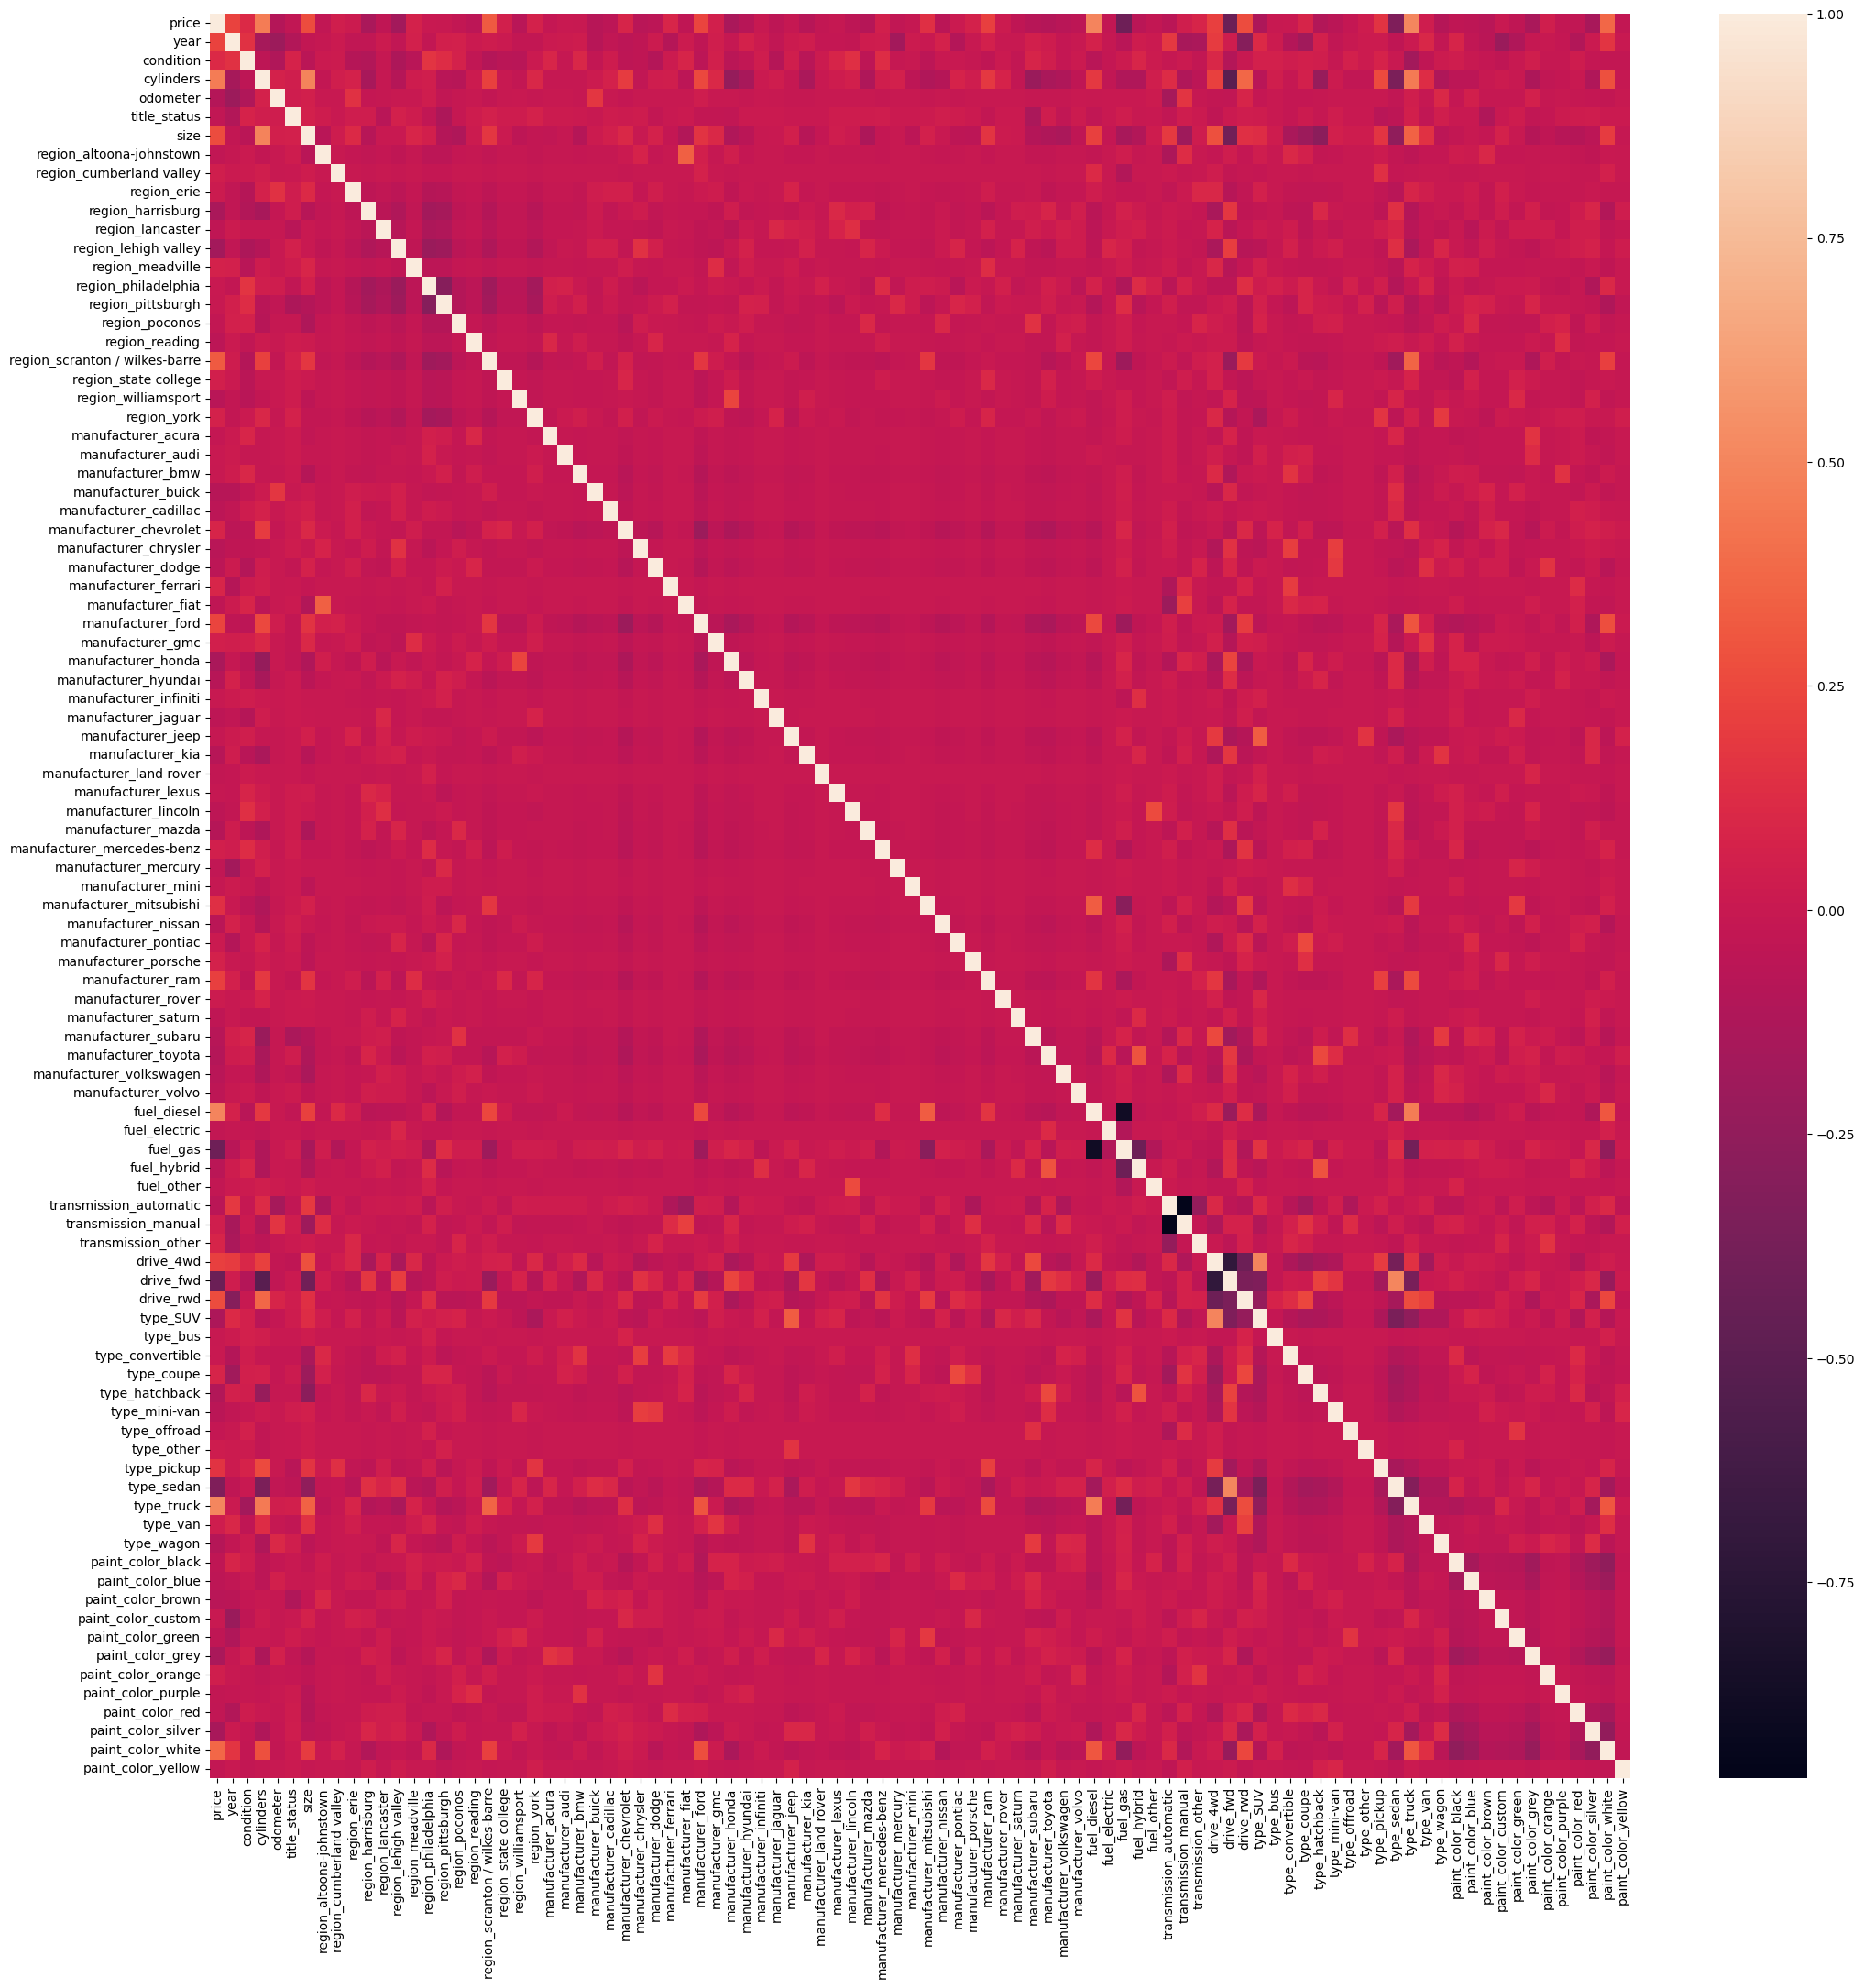

In [215]:
plt.subplots(figsize=(25, 25))
sns.heatmap(corr_matrix)
plt.show()

It seems that the biggest influencers of price based on the correlation coefficients are type_truck, fuel_diesel, and cylinders.

In [218]:
# create two datasets for training
X = vehicles.drop('price', axis = 1)
y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [219]:
scaler = StandardScaler()

# create model, score, and obtain r_2 value of Lasso model
alphas = [0.1, 1, 10, 100, 300]
param_grid = {'lasso__alpha': alphas}
lasso = Lasso(max_iter=100000)
lasso_pipe = make_pipeline(scaler, lasso)
lasso_grid = GridSearchCV(lasso_pipe, param_grid=param_grid, cv=10)
lasso_result = lasso_grid.fit(X_train, y_train)
lasso_pred = lasso_result.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print("Lasso R-squared: ", lasso_r2)

# create model, score, and obtain r_2 value of Linear regression model
pca = PCA(n_components=10)
linear = LinearRegression()
linear_pipe = make_pipeline(scaler, pca, linear)
linear_result = linear_pipe.fit(X_train, y_train)
linear_pred = linear_result.predict(X_test)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression R-squared: ", linear_r2)

Lasso R-squared:  0.5442454815405852
Linear Regression R-squared:  0.4780074946289198


Using the R_squared coefficients for each model, we can see that the Lasso R_squared coefficient is higher meaning it is more reliable. From this information, we will use the Lasso model to find the most influential features of the dataset.

In [222]:
feature_names = X_train.columns
pca = linear_pipe.named_steps['pca']

# obtain coefficients and sort features by 10 highest coefficients
coefficients = lasso_result.best_estimator_.named_steps['lasso'].coef_
lasso_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
lasso_top10 = lasso_df.reindex(lasso_df.Coefficient.abs().sort_values(ascending=False).index).head(10)

print(lasso_top10)

                           Feature  Coefficient
0                             year  2639.244147
57                     fuel_diesel  2561.561204
78                      type_truck  1923.711497
2                        cylinders  1823.127788
66                       drive_fwd -1591.166924
1                        condition  1218.569832
71                      type_coupe  1089.660873
62          transmission_automatic -1017.375549
64              transmission_other   831.618735
17  region_scranton / wilkes-barre   817.416430


Similar to what we found with the correlation matrix above, the top 10 coefficients that we have found from the Lasso model includes fuel_diesel, type_truck, cylinders, and also year. We can conclude that these are the most influential factors of price of used cars.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Based on the dataset given, we have focused our study into cars from Pennsylvania, aiming to find the most influential factors on the sale price of a used car. We have identified 5 key features that influence a car's price negatively and positively, which we will show in sequential order from most impactful to least.

1. The vehicle's year is the most important determinant in a used car's final sale price. A younger vehicle will have the most impact on positively increasing a car's price than any other feature. 

2. Cars that utilize diesel as fuel are also most likely to have a higher price. Obtaining diesel-driven cars in your inventory can help drive prices up.

3. Trucks are likely to have a higher price, so increasing the sale of trucks can help drive profits.

4. Having front wheel drive is the biggest negative factor in a car's price. Avoiding cars with front wheel drive would be the best option.

5. Vehicles with more cylinders often sell at a higher price. 